In [1]:
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from netCDF4 import Dataset
from scipy.interpolate import griddata

In [2]:
xyzFile = '/Users/edwardlrichards/Documents/data/KAM11/enviornment/MBP_survey/CNTL12RR.xyz'
xyz=pd.read_table(xyzFile, names=['lon','lat','z'])
lat_bound = np.array((22.1,22.2))
lon_bound = np.array((-159.85,-159.75))

In [3]:
tom=np.array(xyz[['lat','lon']])

In [4]:
xyz=xyz[(xyz['lat']>=lat_bound[0]) & (xyz['lat']<=lat_bound[1])]
xyz=xyz[(xyz['lon']>=lon_bound[0]) & (xyz['lon']<=lon_bound[1])]

In [5]:
numPoints=1e2
grid_x, grid_y = np.mgrid[lon_bound[0]:lon_bound[1]:1j*numPoints,\
                          lat_bound[0]:lat_bound[1]:1j*numPoints]

In [6]:
points=np.array(xyz[['lon','lat']])
values=np.array(xyz['z'])

In [9]:
grid_z=griddata(points, values, (grid_x, grid_y), method='nearest')

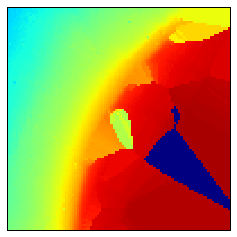

In [10]:
ax=plt.axes(projection=ccrs.UTM(4))
plt.pcolormesh(grid_x,grid_y,grid_z)
plt.clim(-1000,0)
# levels = np.array((-100, -300, -600, -1000))
# plt.contour(grid_x,grid_y,grid_z,levels,colors='k')
# _ = ax.coastlines()
# plt.colorbar()